# Lab 3 - Marcha - Leonardo Afonseca

In [1]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2, "lines.markersize": 20})
import sys, os

## Leitura dos dados

A partir dos dados de dois sujeitos, com amputação de membro, sendo sinalizado como NA para lado não amputado, e A para lado amputado

As médias e desvio padrão se encontram em datasets diferentes e serão unificados abaixo:

In [61]:
y_axis_title = pd.read_excel (r'TF_SUB00_A_mean.xls',skiprows=2).columns
y_axis_title

Index(['POST(-)/ANT(+)', 'ER(-)/IR(+)', 'DOWN(-)/UP(+)', 'ABD(-)/ADD(+)',
       'ER(-)/IR(+).1', 'EXT(-)/FLX(+)', 'ABD(-)/ADD(+).1', 'ER(-)/IR(+).2',
       'EXT(-)/FLX(+).1', 'EVE(-)/INV(+)', 'ABD(-)/ADD(+).2', 'PF(-)/DF(+)',
       'EV(-)/INV(+)', 'ER(-)/IR(+).3', 'PF(-)/DF(+).1'],
      dtype='object')

In [14]:
subject_1_A_mean = pd.read_excel (r'TF_SUB00_A_mean.xls',skiprows=1).iloc[1:]
subject_1_A_std = pd.read_excel (r'TF_SUB00_A_std.xls',skiprows=1).iloc[1:]
subject_1_NA_mean = pd.read_excel (r'TF_SUB00_NA_mean.xls',skiprows=1).iloc[1:]
subject_1_NA_std = pd.read_excel (r'TF_SUB00_NA_std.xls',skiprows=1).iloc[1:]

subject_2_A_mean = pd.read_excel (r'TF_SUB01_A_mean.xls',skiprows=1).iloc[1:]
subject_2_A_std = pd.read_excel (r'TF_SUB01_A_std.xls',skiprows=1).iloc[1:]
subject_2_NA_mean = pd.read_excel (r'TF_SUB01_NA_mean.xls',skiprows=1).iloc[1:]
subject_2_NA_std = pd.read_excel (r'TF_SUB01_NA_std.xls',skiprows=1).iloc[1:]

In [16]:
subject_1_A_mean

,Pelvic Obliquity,Pelvic Rotation,Pelvic Tilt,Hip Add/Abduction,Hip Int/External Rotation,Hip Flexion/Extension,Knee Add/Abduction,Knee Int/External Rotation,Knee Flx/Extension,Ankle Inv/Eversion,Ankle Add/Abduction,Ankle Dorsi/Plantarflexion,Foot Inv/Eversion,Foot Int/External Rotation,Foot DF/Plantarflexion
1,2.56842,-7.75986,24.1063,8.64382,2.26962,36.9368,-2.74327,4.92729,-6.40094,1.87503,-7.49042,1.81639,0.780933,5.03886,21.4582
2,2.42537,-7.34215,24.1262,8.42441,2.38732,36.803,-2.73945,4.95113,-6.42133,1.85248,-7.5579,1.78902,0.967618,4.76122,21.2615
3,2.27195,-6.90861,24.1547,8.16119,2.48694,36.5343,-2.74391,4.96667,-6.43705,1.8792,-7.61179,1.71555,1.17131,4.49919,20.8668
4,2.11419,-6.47135,24.1829,7.86932,2.55564,36.1385,-2.75617,4.97462,-6.45246,1.97408,-7.65674,1.57677,1.40823,4.27183,20.2755
5,1.96296,-6.0462,24.2,7.57168,2.57841,35.6286,-2.7744,4.97631,-6.46932,2.15103,-7.69918,1.35855,1.69291,4.10202,19.4997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,3.21084,-9.57277,24.2992,9.21567,2.06543,35.8906,-2.86459,5.13959,-6.39884,2.14447,-7.38987,1.78125,-0.186574,5.98518,20.3141
98,3.13565,-9.30575,24.2473,9.27108,2.1188,36.3157,-2.85173,5.1143,-6.4671,2.07606,-7.40896,1.77958,0.0236704,5.78305,20.8474
99,3.04419,-8.98055,24.2156,9.24218,2.20494,36.6034,-2.84377,5.09413,-6.52789,2.00304,-7.43541,1.78331,0.213202,5.53385,21.2118
100,2.93448,-8.60562,24.2058,9.13528,2.30407,36.7538,-2.84262,5.07798,-6.57649,1.93501,-7.46442,1.79044,0.387148,5.2601,21.4002


In [17]:
subject_1_A_std

,Pelvic Obliquity,Pelvic Rotation,Pelvic Tilt,Hip Add/Abduction,Hip Int/External Rotation,Hip Flexion/Extension,Knee Add/Abduction,Knee Int/External Rotation,Knee Flx/Extension,Ankle Inv/Eversion,Ankle Add/Abduction,Ankle Dorsi/Plantarflexion,Foot Inv/Eversion,Foot Int/External Rotation,Foot DF/Plantarflexion
1,0.792641,1.08785,1.27827,1.84532,1.88008,2.56389,0.704512,0.657633,1.74042,0.17339,0.416172,0.166865,0.741607,1.72027,0.748292
2,0.791294,1.08391,1.24229,1.82352,1.86338,2.58497,0.731915,0.485856,1.76501,0.167497,0.239443,0.156285,0.731527,1.74425,0.740785
3,0.784052,1.08384,1.20382,1.79093,1.84738,2.61363,0.757625,0.391899,1.79827,0.189261,0.161,0.149606,0.727848,1.76865,0.741744
4,0.770175,1.0888,1.16144,1.7512,1.83099,2.6438,0.777532,0.348297,1.83937,0.230342,0.142147,0.16759,0.732957,1.79133,0.752545
5,0.751308,1.09868,1.11366,1.71053,1.81301,2.66422,0.790935,0.333367,1.88258,0.285624,0.139636,0.21078,0.748827,1.81095,0.770978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.586763,1.21934,1.38834,1.5752,1.81706,2.65111,0.803869,0.365258,1.73414,0.155916,0.108993,0.0711496,0.857182,1.93124,0.913009
98,0.590441,1.24345,1.36227,1.58054,1.79448,2.66135,0.800159,0.349892,1.75395,0.167838,0.114019,0.0776853,0.865179,1.92318,0.883457
99,0.598573,1.26655,1.3287,1.58611,1.76182,2.66885,0.795171,0.338079,1.77083,0.180242,0.125509,0.0852305,0.876065,1.90924,0.851433
100,0.608586,1.28663,1.29072,1.58922,1.72787,2.67333,0.79057,0.330679,1.78295,0.191154,0.139788,0.0925932,0.88976,1.89857,0.815105


## Gráficos

In [124]:
def draw_information(bp_information):


    plt.rcParams['font.size']=20 #valores
    plt.rcParams['xtick.labelsize']=20 # barras
    plt.rcParams['ytick.labelsize']=20 # barras
    plt.rcParams['axes.titlesize']=40 #titulo
    plt.rcParams['axes.labelsize']=30 #eixos
    plt.rcParams['legend.fontsize']=20 #eixos


    linestyle={"linestyle":"--"}
    bp = bp_information #body_part
    

    fig, ax = plt.subplots(1,2,figsize=(30,8))#,sharex=True
    plt.sca(ax[0])
    #fig=plt.figure(figsize=(25,10))
    plt.plot(subject_1_A_mean.index,subject_1_A_mean.iloc[:,bp],lw=6)
    plt.errorbar(subject_1_A_mean.index,subject_1_A_mean.iloc[:,bp],yerr=subject_1_A_std.iloc[:,bp],**linestyle)
    plt.title(subject_1_A_mean.columns[bp]+" - S1")
    plt.xlabel('Ciclo do movimento')
    plt.ylabel(y_axis_title[bp])


    plt.plot(subject_1_NA_mean.index,subject_1_NA_mean.iloc[:,bp],lw=6)
    plt.errorbar(subject_1_NA_mean.index,subject_1_NA_mean.iloc[:,bp],yerr=subject_1_NA_std.iloc[:,bp],**linestyle)
    
    
    # Place a legend to the right of this smaller subplot.
    #plt.legend(bbox_to_anchor=(0., 1.1, 1., .2), loc='lower left',ncol=2, mode="expand", borderaxespad=0.)

    plt.legend(["Média amputado",'Média não amputado', "Std Amputado",'Std não amputado'])
    
    
    
    plt.sca(ax[1])
    #fig=plt.figure(figsize=(25,10))
    plt.plot(subject_2_A_mean.index,subject_2_A_mean.iloc[:,bp],lw=6)
    plt.errorbar(subject_2_A_mean.index,subject_2_A_mean.iloc[:,bp],yerr=subject_2_A_std.iloc[:,bp],**linestyle)
    plt.title(subject_2_A_mean.columns[bp]+" - S2")
    plt.xlabel('Ciclo do movimento')
    plt.ylabel(y_axis_title[bp])


    plt.plot(subject_2_NA_mean.index,subject_2_NA_mean.iloc[:,bp],lw=6)
    plt.errorbar(subject_2_NA_mean.index,subject_2_NA_mean.iloc[:,bp],yerr=subject_2_NA_std.iloc[:,bp],**linestyle)
    
    
    # Place a legend to the right of this smaller subplot.
    #plt.legend(bbox_to_anchor=(0., 1.1, 1., .2), loc='lower left',ncol=2, mode="expand", borderaxespad=0.)

    plt.legend(["Média amputado",'Média não amputado', "Std Amputado",'Std não amputado'])

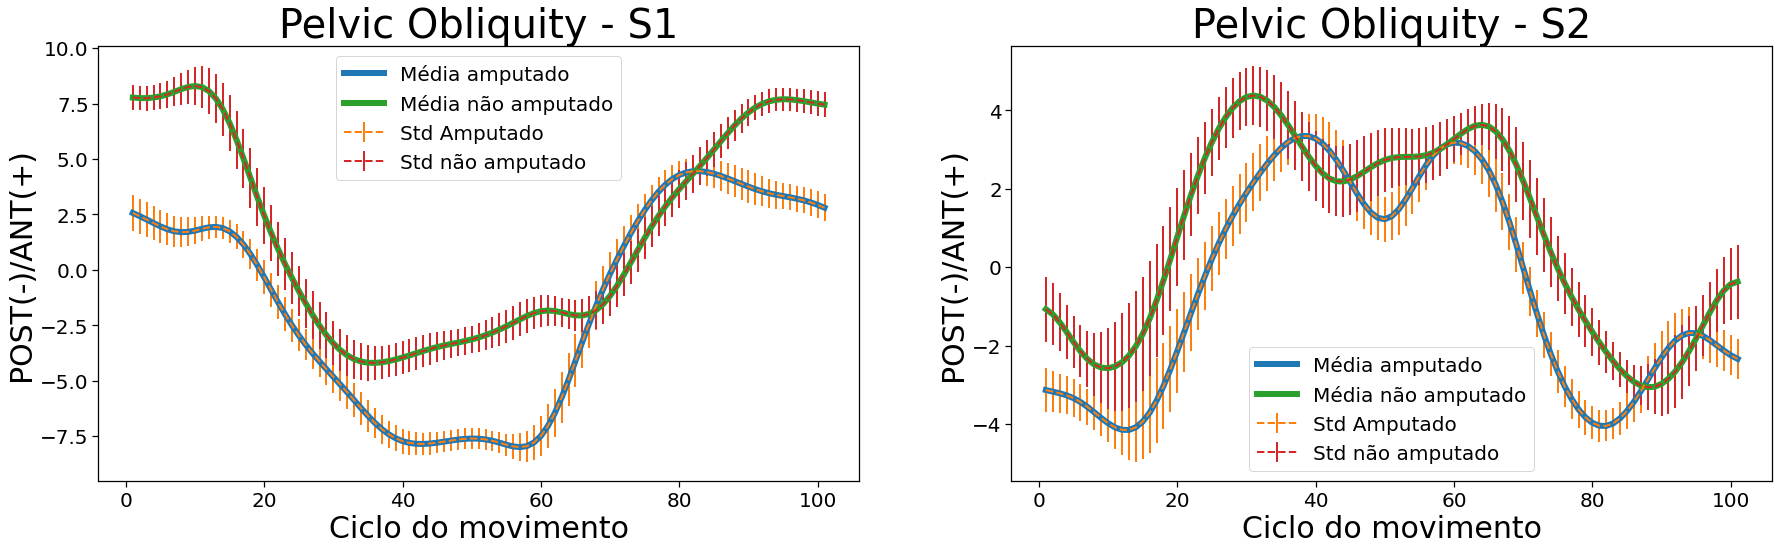

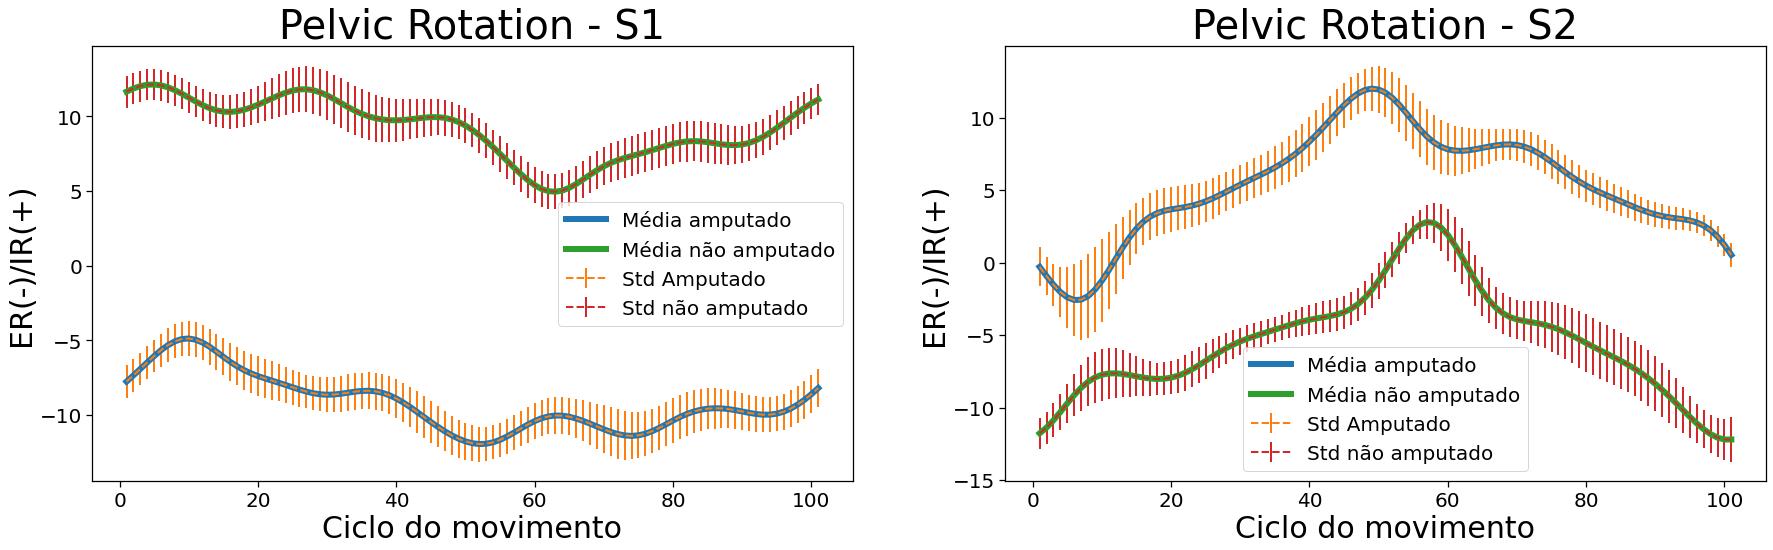

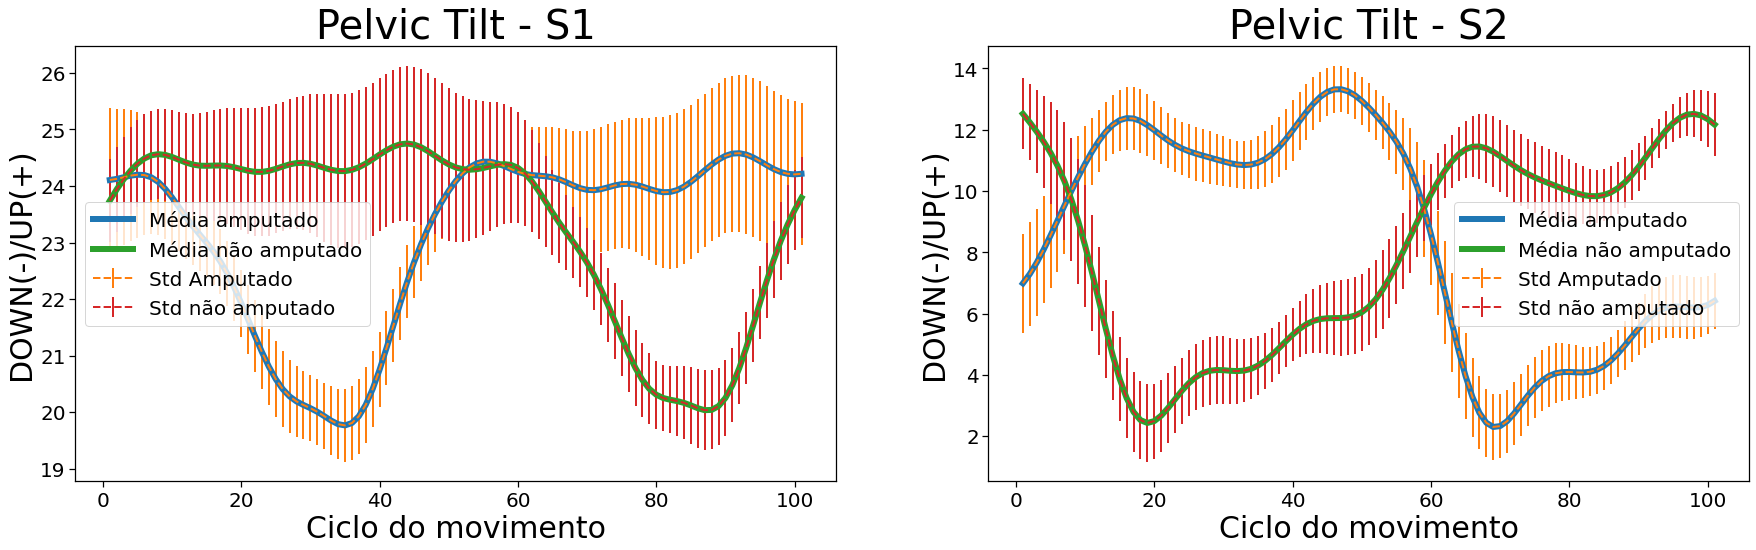

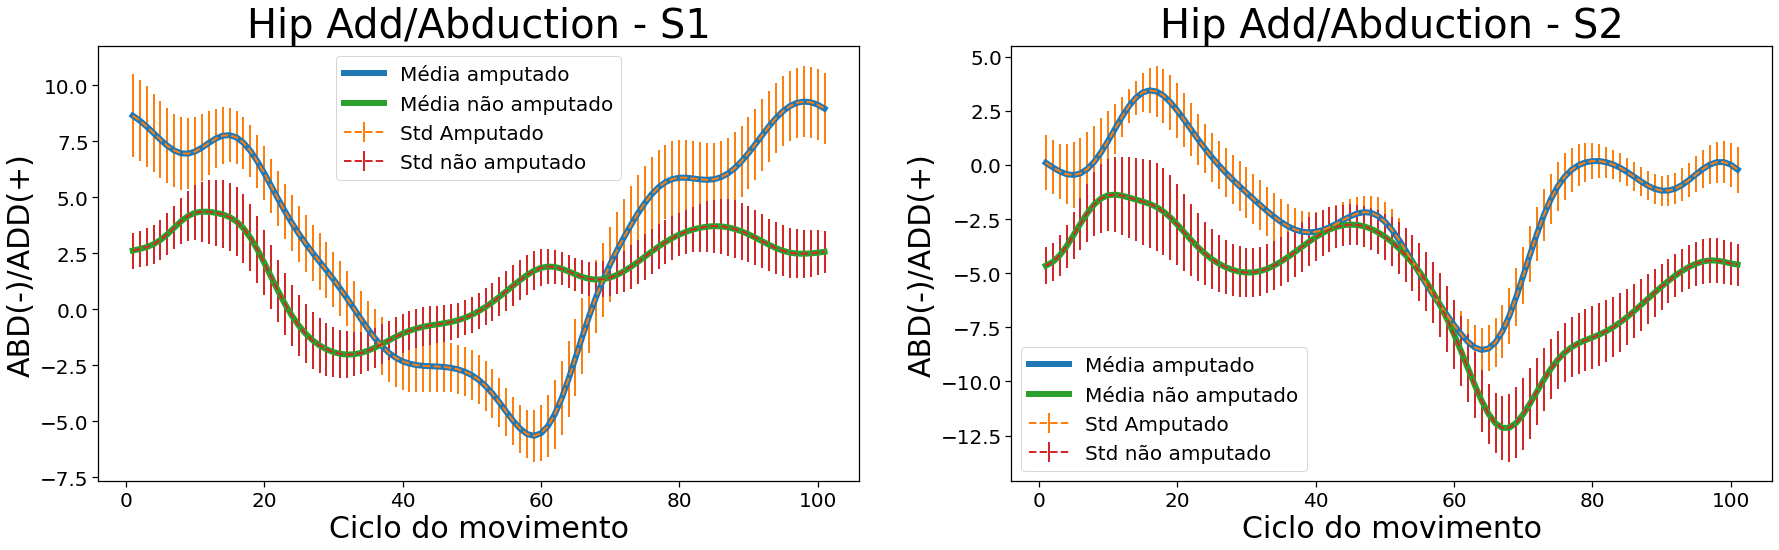

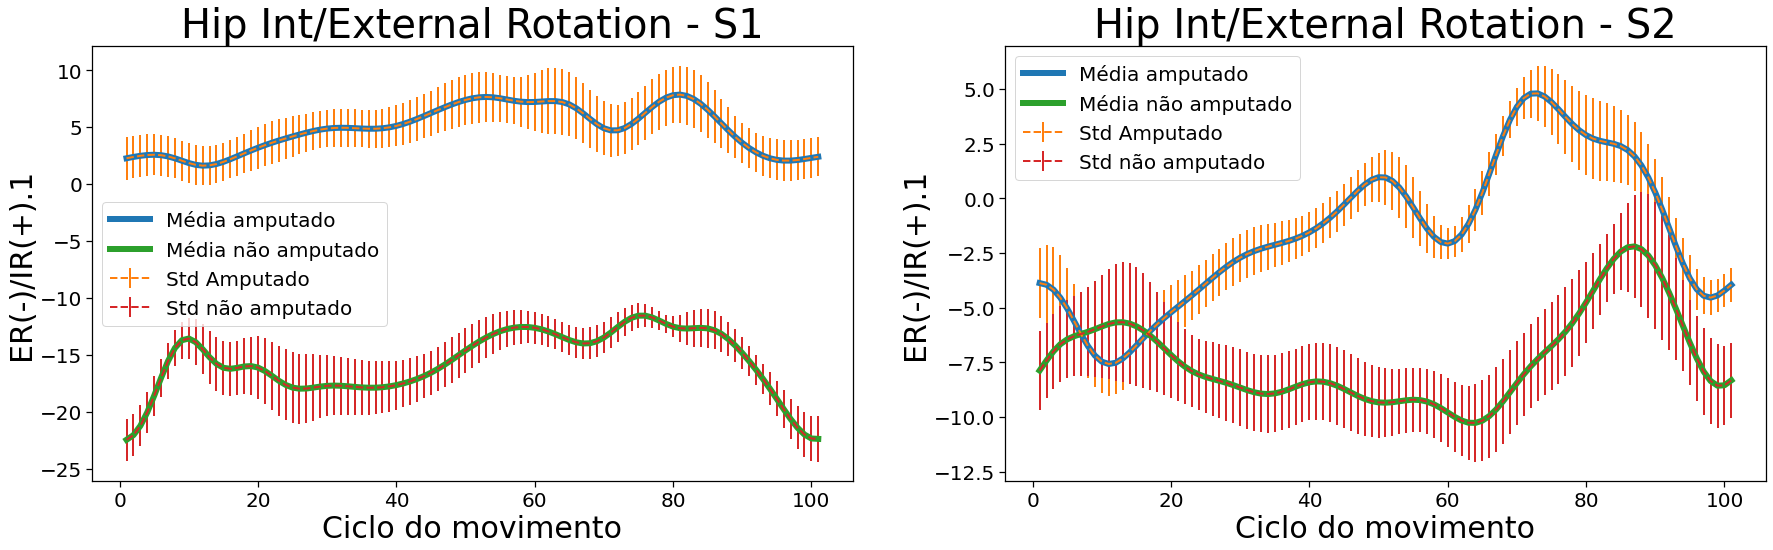

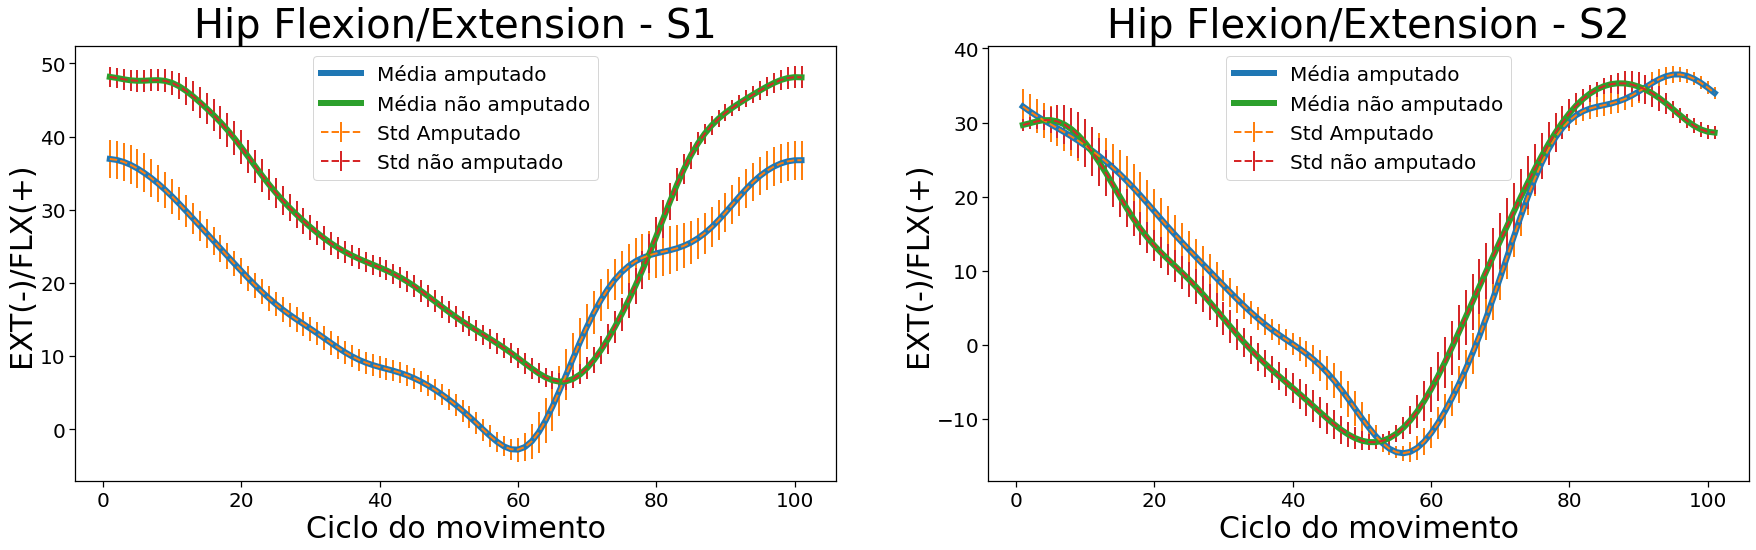

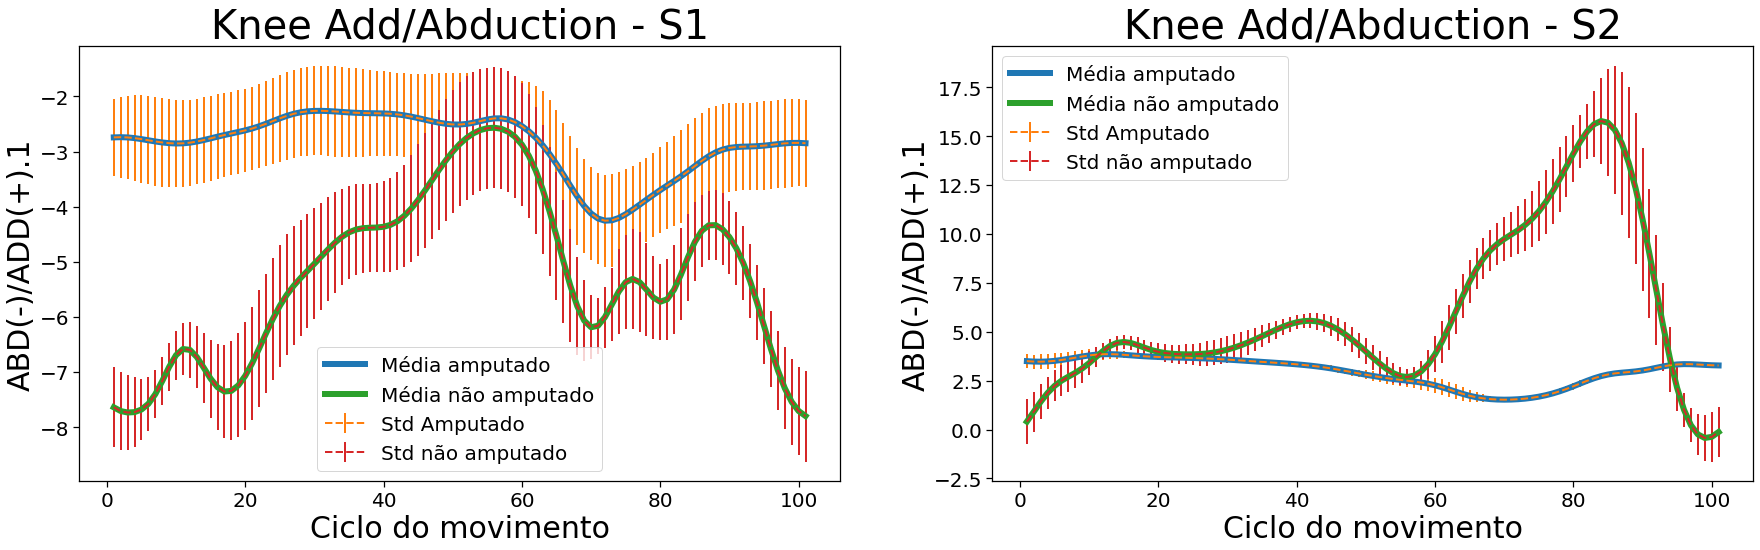

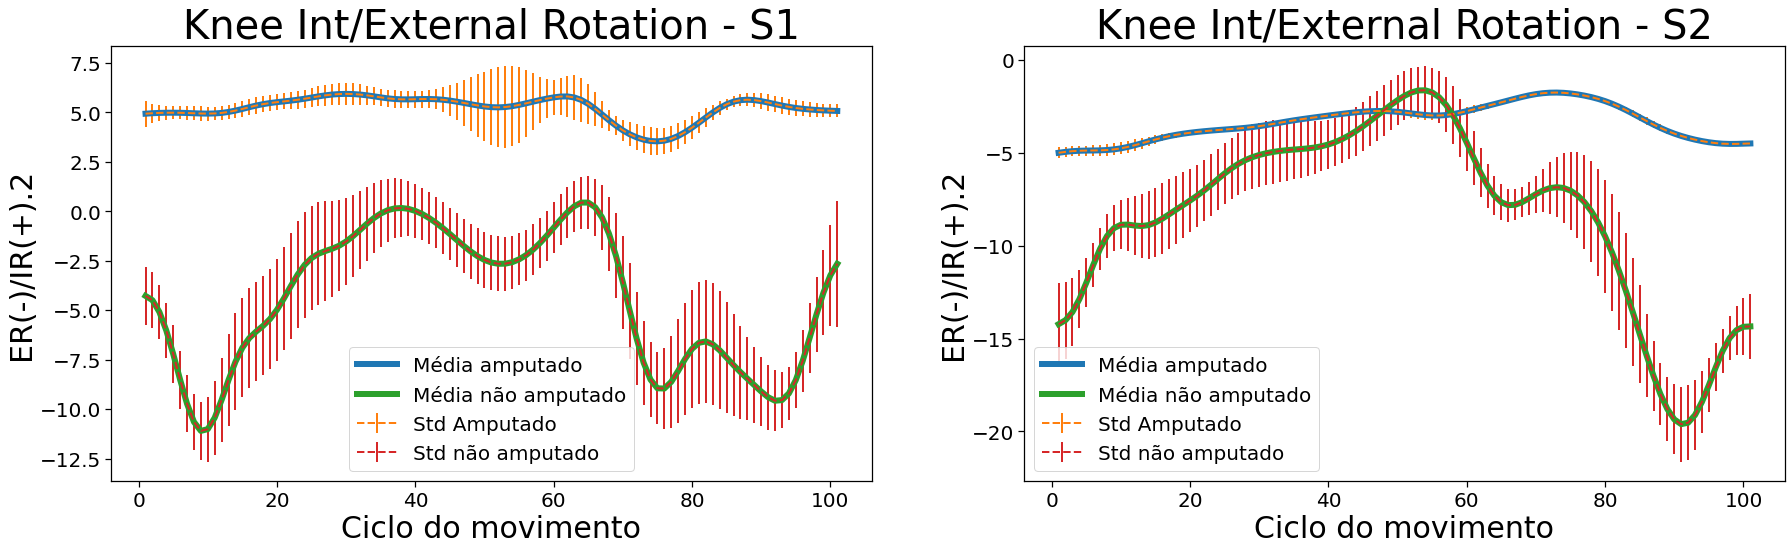

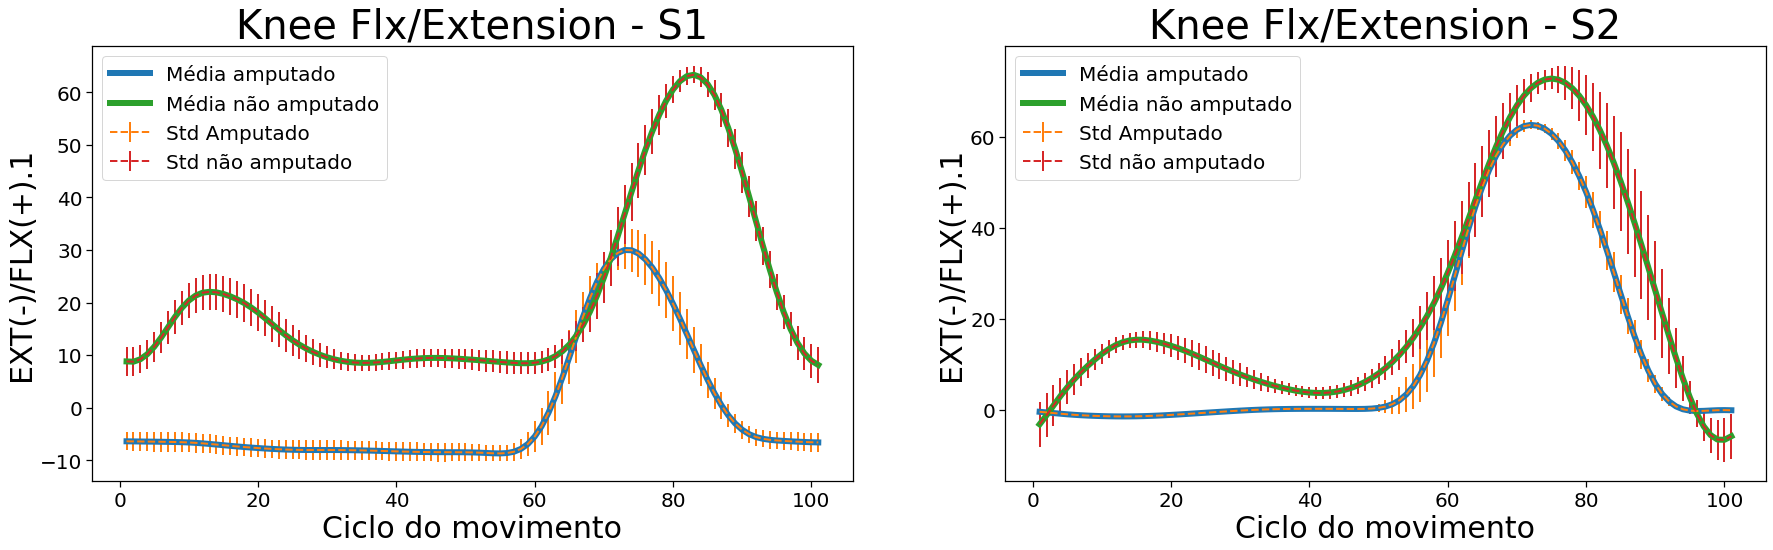

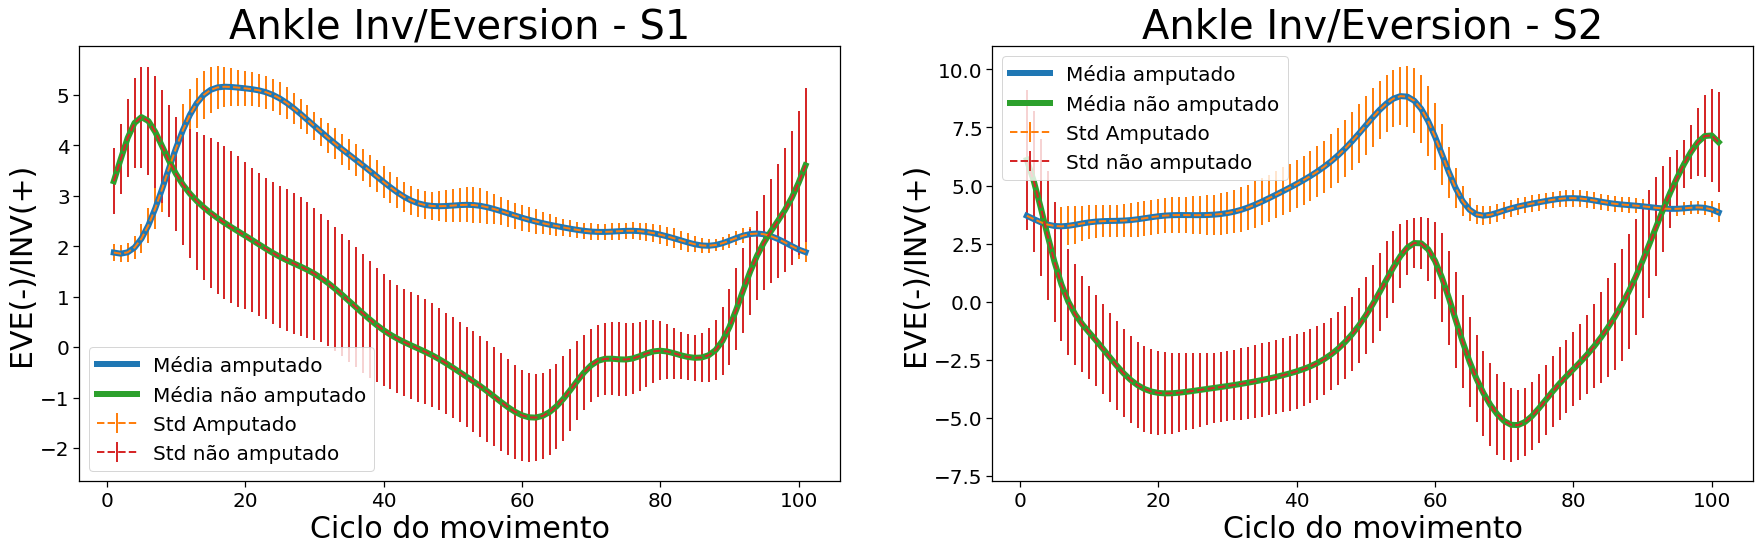

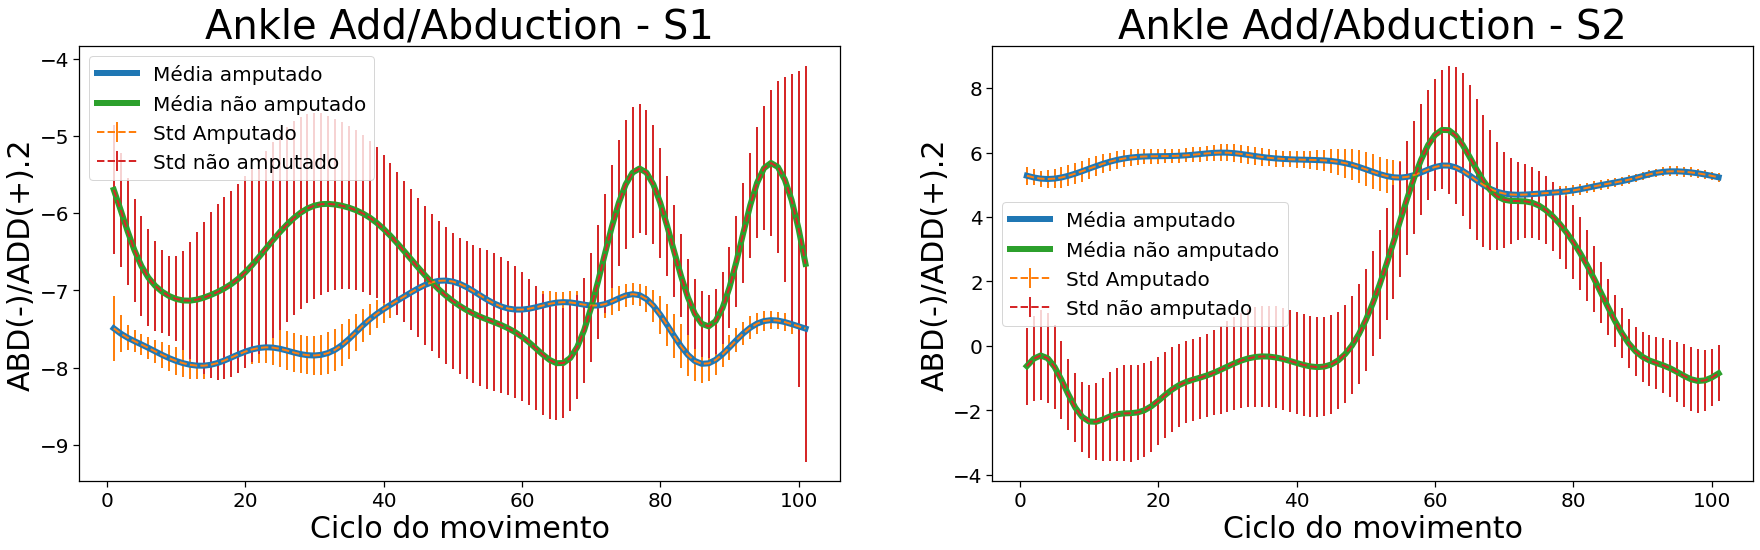

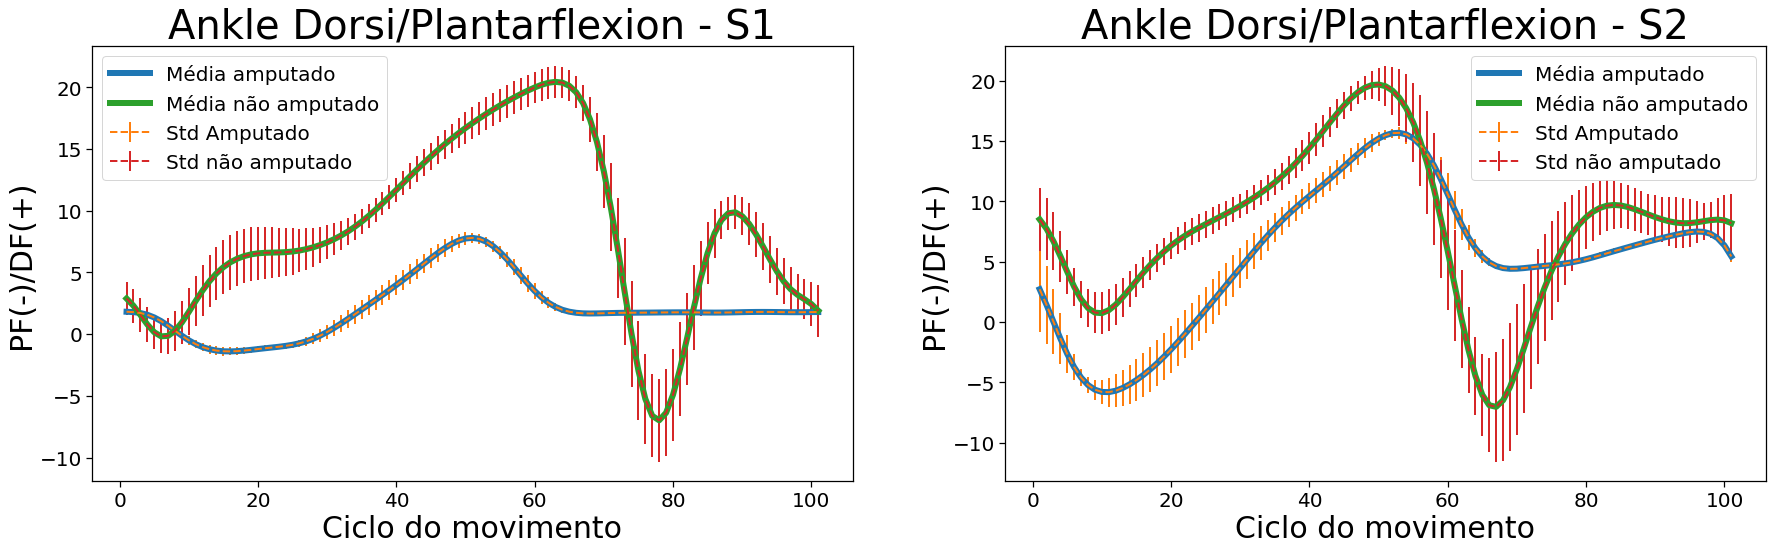

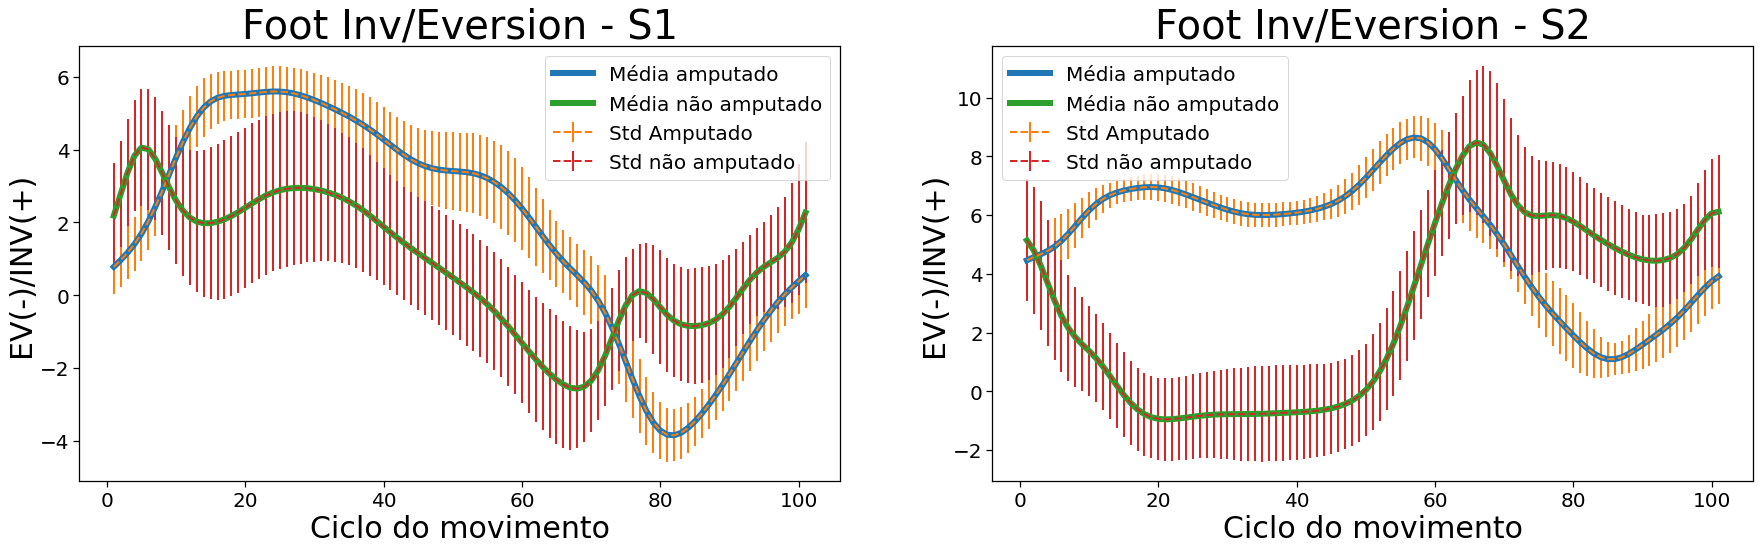

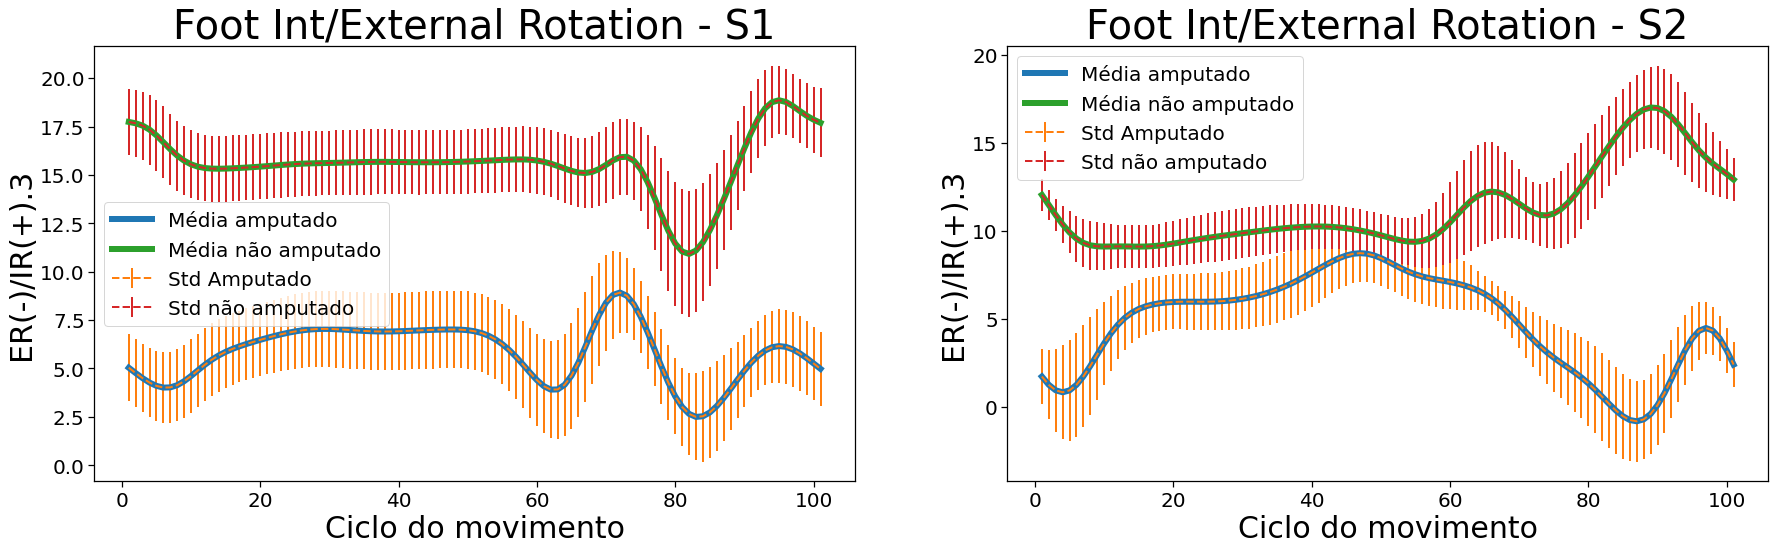

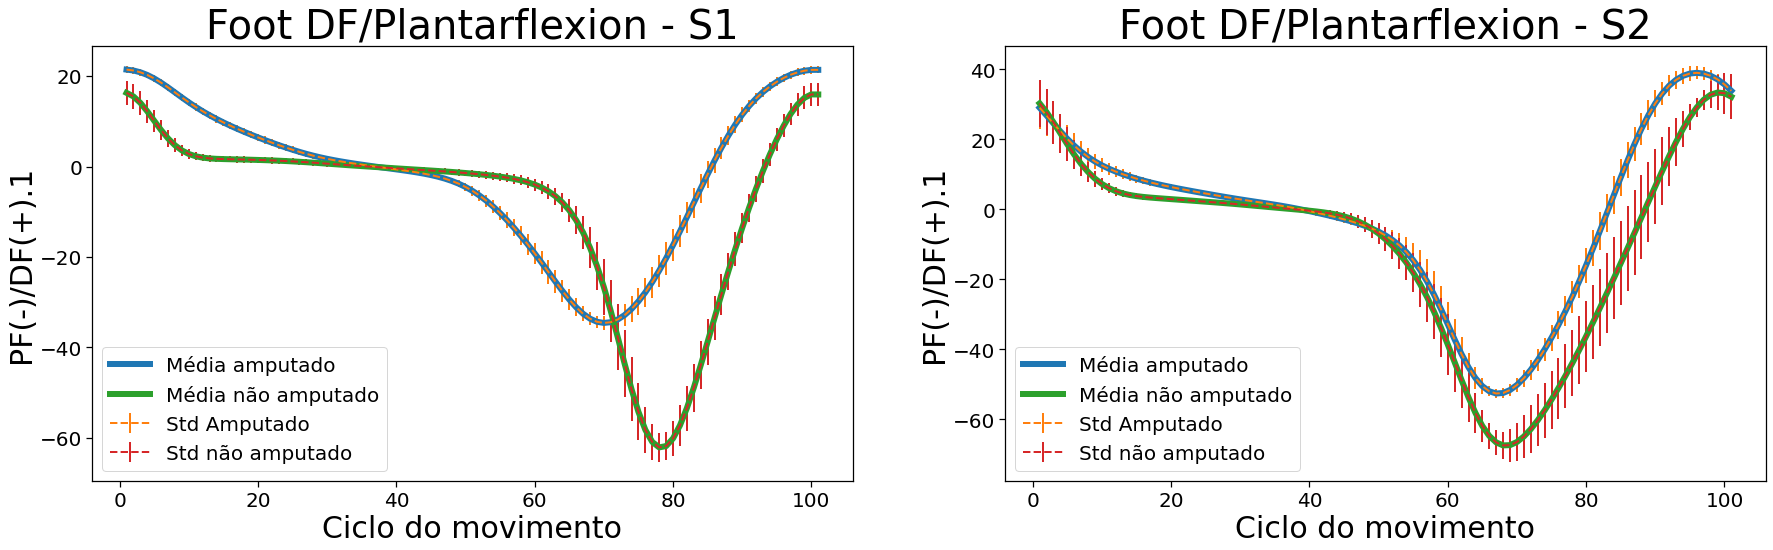

In [125]:
for body_part in range(15):
    draw_information(body_part)